In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [133]:
df = pd.read_csv("Real estate.csv")
# df = df.drop(columns='No',axis=1)
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [134]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [135]:
x = df.drop(['No','X1 transaction date','Y house price of unit area'],axis=1)
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [136]:
y = df['Y house price of unit area']

In [137]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state=42)

In [138]:
train_test_split(x,y,test_size=0.2,random_state=42)

[     X2 house age  X3 distance to the nearest MRT station  \
 192          43.8                                57.58945   
 234           8.0                              2216.61200   
 5             7.1                              2175.03000   
 45           36.6                               488.81930   
 245           7.5                               639.61980   
 ..            ...                                     ...   
 71           35.5                               640.73910   
 106          17.2                               189.51810   
 270          10.8                               252.58220   
 348           4.6                               259.66070   
 102           1.1                               193.58450   
 
      X4 number of convenience stores  X5 latitude  X6 longitude  
 192                                7     24.96750     121.54069  
 234                                4     24.96007     121.51361  
 5                                  3     24.96305   

# Linear Regression

In [139]:
model = LinearRegression()

In [140]:
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [141]:
if model.intercept_ < 0:
    model.intercept_ = 0

model.intercept_

0

In [142]:
model.coef_

array([-2.70593236e-01, -4.55249601e-03,  1.10512079e+00,  2.36092831e+02,
       -2.39036942e+01])

In [143]:
ypred = model.predict(xtest)
ypred

array([2994.40066384, 2988.61370555, 2991.19884753, 2987.99583834,
       2976.94433903, 2989.50360837, 2992.64603026, 2992.56485228,
       2971.44255367, 2998.67954826, 2978.897665  , 2981.43427919,
       2986.17277946, 2971.56089801, 2982.3987087 , 2979.65438607,
       2988.62749119, 2993.64548231, 2978.15986213, 2991.15144243,
       2948.87248595, 2980.30266962, 2994.42296202, 2990.22260301,
       2960.73187851, 2987.95768995, 2961.39201184, 2991.19884753,
       2982.7985857 , 2984.41905303, 2958.32097321, 2985.88733991,
       2984.49767631, 2975.27220616, 2992.59386643, 2978.18811201,
       2998.86896353, 2961.84074616, 2993.5041738 , 2987.1335084 ,
       2982.67580367, 2987.23938034, 2995.04755878, 2986.55318493,
       2988.66782419, 2994.88628836, 2991.73138579, 2970.18787482,
       2996.64382882, 2994.79819228, 2994.40066384, 2995.20095823,
       2987.60639988, 2989.20528357, 2983.04652255, 2961.81368683,
       2981.79233944, 2983.05752149, 2976.86316105, 2992.56485

In [144]:
ytest-ypred

358   -2949.300664
350   -2946.313706
373   -2938.998848
399   -2950.695838
369   -2954.144339
          ...     
31    -2964.372436
283   -2955.088031
157   -2952.952311
203   -2946.627208
208   -2951.142772
Name: Y house price of unit area, Length: 83, dtype: float64

In [145]:
r2_score(ytest,ypred)

-51769.09939209218

In [146]:
model.score(xtest,ytest)

-51769.09939209218

In [147]:
mean_squared_error(ytest,ypred)

8684938.647805318

In [148]:
mean_absolute_error(ytest,ypred)

2947.012757370446

# Polynomial Regression

In [149]:
poly = PolynomialFeatures(degree=2)
xpoly = poly.fit_transform(xtrain)
xpoly

array([[1.00000000e+00, 4.38000000e+01, 5.75894500e+01, ...,
        6.23376056e+02, 3.03456718e+03, 1.47721393e+04],
       [1.00000000e+00, 8.00000000e+00, 2.21661200e+03, ...,
        6.23005094e+02, 3.03298821e+03, 1.47655574e+04],
       [1.00000000e+00, 7.10000000e+00, 2.17503000e+03, ...,
        6.23153865e+02, 3.03332361e+03, 1.47652974e+04],
       ...,
       [1.00000000e+00, 1.08000000e+01, 2.52582200e+02, ...,
        6.23730645e+02, 3.03517463e+03, 1.47696527e+04],
       [1.00000000e+00, 4.60000000e+00, 2.59660700e+02, ...,
        6.23793083e+02, 3.03569368e+03, 1.47732259e+04],
       [1.00000000e+00, 1.10000000e+00, 1.93584500e+02, ...,
        6.23286676e+02, 3.03435461e+03, 1.47721879e+04]], shape=(331, 21))

In [150]:
xtest

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,1.1,193.5845,6,24.96571,121.54089
350,13.2,492.2313,5,24.96515,121.53737
373,0.0,274.0144,1,24.97480,121.53059
399,12.7,170.1289,1,24.97371,121.52984
369,20.2,2185.1280,3,24.96322,121.51237
...,...,...,...,...,...
31,29.6,769.4034,7,24.98281,121.53408
283,33.5,1978.6710,2,24.98674,121.51844
157,16.1,815.9314,4,24.97886,121.53464
203,15.6,289.3248,5,24.98203,121.54348


In [151]:
model = LinearRegression()
model.fit(xpoly,ytrain)    
# model.score(xtest,ytest)
xtestpoly = poly.transform(xtest)
# model.predict(xtest)
xtestpoly

array([[1.00000000e+00, 1.10000000e+00, 1.93584500e+02, ...,
        6.23286676e+02, 3.03435461e+03, 1.47721879e+04],
       [1.00000000e+00, 1.32000000e+01, 4.92231300e+02, ...,
        6.23258715e+02, 3.03419867e+03, 1.47713323e+04],
       [1.00000000e+00, 0.00000000e+00, 2.74014400e+02, ...,
        6.23740635e+02, 3.03520218e+03, 1.47696843e+04],
       ...,
       [1.00000000e+00, 1.61000000e+01, 8.15931400e+02, ...,
        6.23943447e+02, 3.03579676e+03, 1.47706687e+04],
       [1.00000000e+00, 1.56000000e+01, 2.89324800e+02, ...,
        6.24101823e+02, 3.03640286e+03, 1.47728175e+04],
       [1.00000000e+00, 1.15000000e+01, 1.36013900e+03, ...,
        6.22604300e+02, 3.03288104e+03, 1.47740184e+04]], shape=(83, 21))

In [152]:
model.score(xtestpoly,ytest)

0.7510041114955954

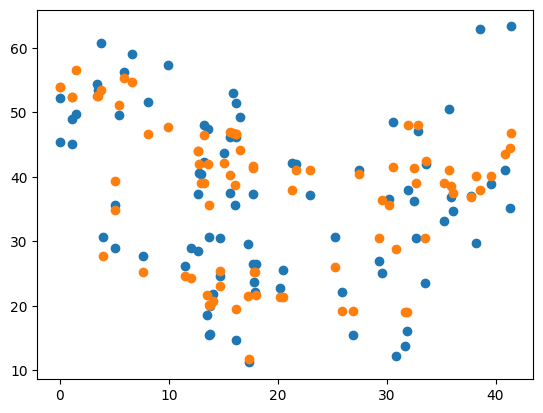

In [153]:
ypred = model.predict(xtestpoly)
plt.scatter(xtestpoly[:,1],ytest)
plt.scatter(xtestpoly[:,1],ypred)


In [154]:
ypred = model.predict(xtestpoly)

In [155]:
r2_score(ytest,ypred)

0.7510041114955954

In [156]:
mean_absolute_error(ytest,ypred)

4.813889823114415

In [157]:
mean_squared_error(ytest,ypred)

41.77148664209148

In [159]:
# plt.plot(df['X1 transaction date'],df['Y house price of unit area'])

In [160]:
d=pd.DataFrame({'X2 house age':[12],'X3 distance to the nearest MRT station':[20],'X4 number of convenience stores':[5],'X5 latitude':[30], 'X6 longitude':[40]})

In [161]:
dtest = poly.transform(d)

In [162]:
model.predict(dtest)

array([6555785.27063003])